# Project 3 – Data Cleaning (Task 1: AB_NYC_2019)

**Dataset:** `AB_NYC_2019.csv`  

Goal: Clean the Airbnb NYC listings dataset to ensure:
- Data integrity  
- Proper handling of missing values  
- Duplicate removal  
- Standardisation of formats  
- Outlier detection for `price`

Code is kept short with clear explanations and simple visual checks.

In [23]:

# 1. IMPORT LIBRARIES & LOAD DATA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
pd.set_option("display.max_columns", None)

# Upload dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("AB_NYC_2019.csv")
df.head()


Saving AB_NYC_2019.csv to AB_NYC_2019 (4).csv


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [24]:

# 2. BASIC EXPLORATION – STRUCTURE, MISSING VALUES, DUPLICATES

print("=== Info ===")
print(df.info())

print("\n=== Missing values per column ===")
print(df.isna().sum())

print("\n=== Number of duplicate rows ===")
print(df.duplicated().sum())

print("\n=== Summary statistics (numeric columns) ===")
df.describe()


=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review        

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


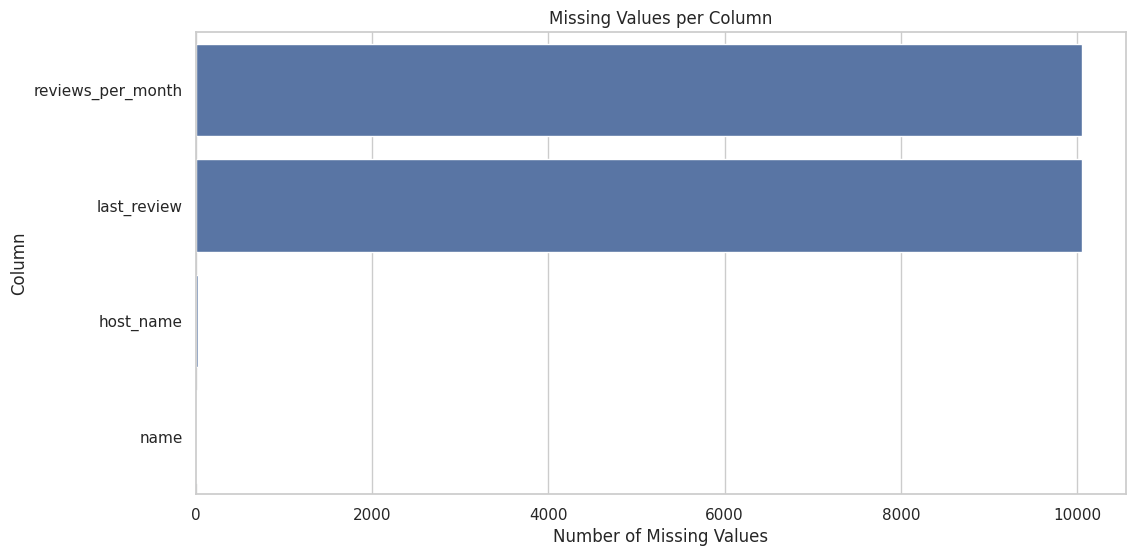

In [25]:

# 3. VISUALISING MISSING DATA (BAR PLOT)

missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

if not missing_counts.empty:
    plt.figure()
    sns.barplot(x=missing_counts.values, y=missing_counts.index)
    plt.title("Missing Values per Column")
    plt.xlabel("Number of Missing Values")
    plt.ylabel("Column")
    plt.show()
else:
    print("No missing values in this dataset.")


In [26]:

# 4. DATA CLEANING – MISSING VALUES, DUPLICATES, FORMATS

data = df.copy()

# 4.1 Remove exact duplicate rows
print("Duplicates before:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Duplicates after:", data.duplicated().sum())

# 4.2 Handle missing numeric values with median, others with mode
num_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes(include=["object"]).columns

for col in num_cols:
    if data[col].isna().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

for col in cat_cols:
    if data[col].isna().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

print("Total missing values after filling:", data.isna().sum().sum())

# 4.3 Convert date columns to datetime (if present)
if "last_review" in data.columns:
    data["last_review"] = pd.to_datetime(data["last_review"], errors="coerce")

# 4.4 Standardise text columns by stripping spaces
for col in cat_cols:
    data[col] = data[col].astype(str).str.strip()

data.head()


Duplicates before: 0
Duplicates after: 0
Total missing values after filling: 0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


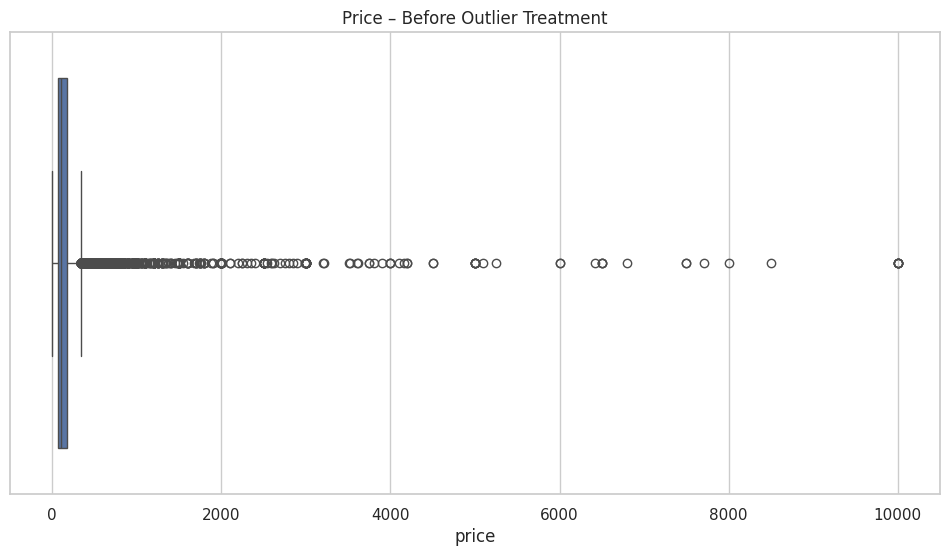

Price lower bound: -90.0
Price upper bound: 334.0


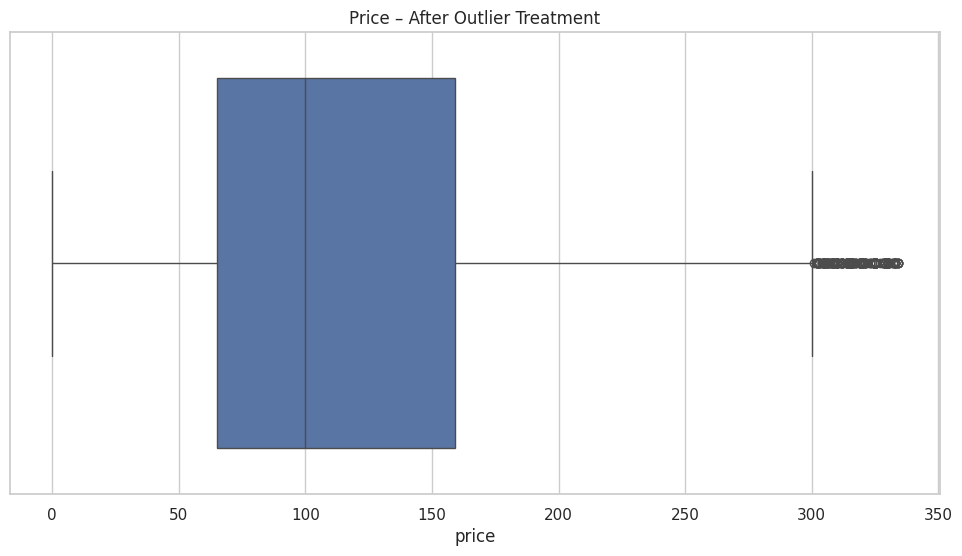

In [27]:

# 5. OUTLIER DETECTION & TREATMENT FOR PRICE (IQR METHOD)

# Visualise price distribution before cleaning
plt.figure()
sns.boxplot(x=data["price"])
plt.title("Price – Before Outlier Treatment")
plt.show()

# IQR method to filter extreme outliers
Q1 = data["price"].quantile(0.25)
Q3 = data["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Price lower bound:", lower_bound)
print("Price upper bound:", upper_bound)

# Keep only rows within bounds
data = data[(data["price"] >= lower_bound) & (data["price"] <= upper_bound)]

# Visualise price distribution after cleaning
plt.figure()
sns.boxplot(x=data["price"])
plt.title("Price – After Outlier Treatment")
plt.show()


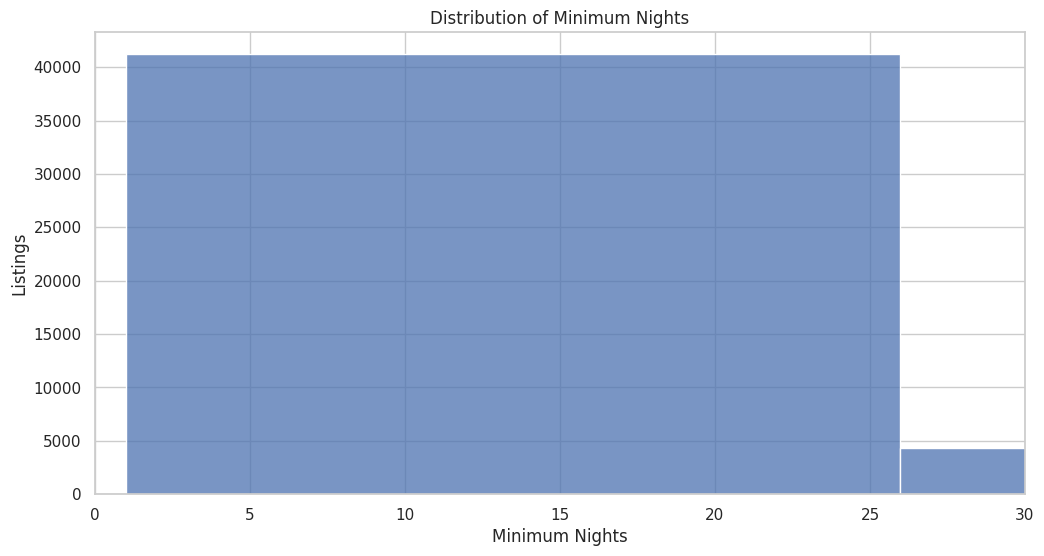

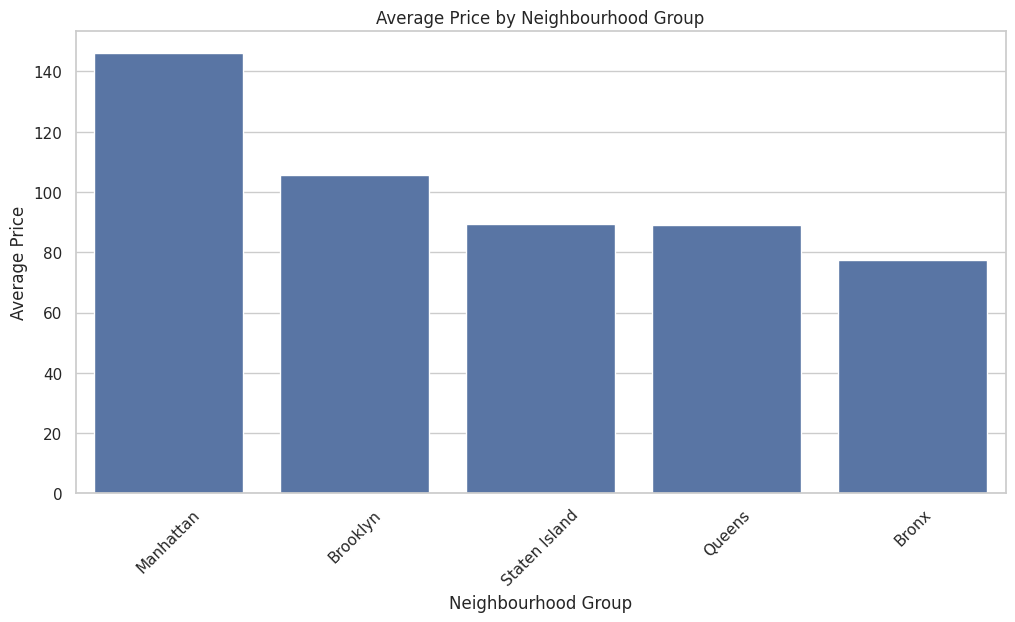

In [28]:

# 6. SIMPLE PLOTS ON CLEANED DATA

# 6.1 Distribution of minimum_nights
if "minimum_nights" in data.columns:
    plt.figure()
    sns.histplot(data["minimum_nights"], bins=50, kde=False)
    plt.title("Distribution of Minimum Nights")
    plt.xlabel("Minimum Nights")
    plt.ylabel("Listings")
    plt.xlim(0, data["minimum_nights"].quantile(0.95))
    plt.show()

# 6.2 Average price per neighbourhood_group (if exists)
if {"neighbourhood_group", "price"}.issubset(data.columns):
    avg_price_ng = data.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False)
    plt.figure()
    sns.barplot(x=avg_price_ng.index, y=avg_price_ng.values)
    plt.title("Average Price by Neighbourhood Group")
    plt.ylabel("Average Price")
    plt.xlabel("Neighbourhood Group")
    plt.xticks(rotation=45)
    plt.show()


In [32]:
import os

# 7. SAVE CLEANED DATASET

output_dir = "../cleaned_output"
output_path = os.path.join(output_dir, "AB_NYC_2019_cleaned.csv")

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

data.to_csv(output_path, index=False)
print("Cleaned dataset saved to:", output_path)

Cleaned dataset saved to: ../cleaned_output/AB_NYC_2019_cleaned.csv


# Summary of Cleaning – AB_NYC_2019

**Steps Performed:**
- Checked structure, missing values, and duplicates  
- Removed duplicate rows  
- Filled missing numeric values with the median and categorical values with the mode  
- Converted `last_review` to datetime (if present)  
- Standardised text columns by trimming spaces  
- Detected outliers in `price` using the IQR method and removed extreme values  
- Created plots for minimum nights and average price by neighbourhood_group  
- Saved the cleaned dataset as `AB_NYC_2019_cleaned.csv` in the `cleaned_output` folder.